This is the Juypter Notebook for Joe McGrath's submission for the Udacity Machine Learning Engineer nanodegree program.
This file contains the relevant code-blocks, assiocated comments and visual aids to be used in conjunction with the written PDF piece.


In [1]:
##Importing initial libs in order to handle and process data tables.
import numpy as np
import pandas as pd
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
#import visuals as vs
%matplotlib inline
#Plotting libaries
#Machine Learning libaries 
from sklearn.model_selection import train_test_split


In [2]:
#Additional code block for defining functions
#Importing the scoring functions we plan on using in this project
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score

# Training func - This function is used to take a model and train it.
#@train -array[]- Training data
#@res -array[]- Result data
#@model - model object - A model object which is to be used for training
#@add - array[] - Additional parameters to pass if required
def trainer(train,res,model,add):
    #Note start time
    st=time.time()
    if 0<len(add):
        model.fit(train,res, add)
    else:
        model.fit(train,res)
    #Note time taken to train model
    timeTaken=time.time()-st
    print("Time taken to fit model - "+str(timeTaken))
    return model

# Performance Metric - A function to measure the performance of our model
#@y_true - array[] - Actual values
#@y_predict - array[] - Predicted values
def performance_metric(y_true, y_predict):
    #Running the performance metrics on the results and predicitions
    Rscore = r2_score(y_true, y_predict)
    mse=mean_squared_error(y_predict,y_true)
    print("R^2 Score is "+str(Rscore))
    print("MSE Score is "+str(mse))

# Testing func - Function which predicts results and then measures the performance
#@results - array[] - Actual values
#@inputData - array[] - Feature data to predict results from 
#@model - model object - Model to predict results
def testFunc(results, inputData, model):
    #Note start time
    st=time.time()
    predicts = model.predict(inputData)
    #Note time taken to test model
    timeTaken =time.time()-st
    print("Time taken to predict results - "+str(timeTaken))
    performance_metric(results, predicts)
    return predicts

In [3]:
from sklearn.model_selection import train_test_split
#Importing out dataset
data = pd.read_csv('data/train.csv')
data = pd.DataFrame(data)

#Summary statistics
#Target variables
#Double [[]] wrapping ensure stays as pandas dataframe
targData=data[['critical_temp']]
#Feature variables
#Dropping the target variables from the data-set
featData=data.drop(['critical_temp'],axis=1)
##Such that we are left with only the extracted features from the material properties
featData=featData.drop(['number_of_elements'],axis=1)
#featData.describe().transpose()
#break
#Data Transformation
#Applying lograthmic and Scaling to the data-set prior to training/testing
#Applying lograthmic transformation to the data-set
cols=list(featData)
featData[cols] = featData[cols].apply(lambda x: np.log(x + 1))
featData.describe().transpose()
# Visualize the new log distributions
#vs.distribution(features_log_transformed, transformed = True)

#Applying a scaler to the data-set in order to normalise the date (0,1)
#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledData=pd.DataFrame(data=featData)
scaledData.head()
scaledData[cols]=scaler.fit_transform(scaledData[cols])
scaledData.describe().transpose()

#Splitting data
# Training/Test data
X_train, X_test, y_train, y_test = train_test_split(scaledData, targData, test_size=0.20, random_state=42)

X_train_true=X_train
y_train_true=y_train
X_train_true.shape
y_train_true.shape

(17010, 1)

In [4]:
##This code block is used to extract the summary statistics about the data.
from scipy.stats import describe
#print(describe(targData, axis=0))
#featData.describe()
#targData.describe()
df=featData[['mean_atomic_mass','mean_ThermalConductivity','mean_Density','mean_atomic_radius','mean_ElectronAffinity','mean_Valence']].describe()
#describe(featData[['mean_atomic_mass','mean_ThermalConductivity','mean_Density','mean_atomic_radius','mean_ElectronAffinity','mean_Valence']],axis=0)
df.rename(index=str, columns={'mean_atomic_mass':"Atomic Mass",'mean_ThermalConductivity':"Thermal Conductivity",'mean_Density':"Density",'mean_atomic_radius':"Atomic Radius",'mean_ElectronAffinity':"Electron Affinity",'mean_Valence':"Valence"})

,Atomic Mass,Thermal Conductivity,Density,Atomic Radius,Electron Affinity,Valence
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,0.717333,0.752251,0.847425,0.645905,0.691341,0.514676
std,0.115287,0.102900,0.045032,0.075295,0.083909,0.166917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.679295,0.709080,0.823781,0.619828,0.662349,0.368483
50%,0.727153,0.787367,0.841955,0.658587,0.695351,0.469300
75%,0.777739,0.811340,0.867460,0.690585,0.727107,0.660964
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


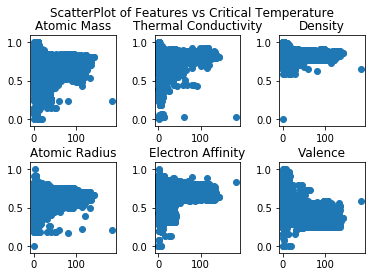

<Figure size 432x288 with 0 Axes>

In [5]:
from pandas.tools.plotting import bootstrap_plot
#bootstrap_plot(targData, size=50,  color='grey')
##ScatterPlot Matrix##
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Atomic Mass')
plt.scatter(targData,featData['mean_atomic_mass'])
plt.subplot(2,3,2)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Thermal Conductivity')
plt.scatter(targData,featData['mean_ThermalConductivity'])
plt.subplot(2,3,3)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Density')
plt.scatter(targData,featData['mean_Density'])
plt.subplot(2,3,4)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Atomic Radius')
plt.scatter(targData,featData['mean_atomic_radius'])
plt.subplot(2,3,5)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Electron Affinity')
plt.scatter(targData,featData['mean_ElectronAffinity'])
plt.subplot(2,3,6)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Valence')
plt.scatter(targData,featData['mean_Valence'])
plt.suptitle('ScatterPlot of Features vs Critical Temperature')
plt.show()
plt.gcf().clear()
##Histogram##
#plt.hist(targData, 20, facecolor='blue')
#plt.show()


In [6]:
#Lasso Regression -- Feature selection
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
print("Lasso Regression Model")
##Lasso Regression

#clf = linear_model.Lasso(random_state=42)
print("Applying GridSearchCV to the model")
#Using GridSearchCV to optimise the parameters for the model
#Parameters we are looking to optimise
param_dict = {"alpha":[0.9,0.7,0.5,0.3,0.1,0.01],
             "selection":['cyclic','random'],
             "max_iter":[1000,1500,2500,5000]}

###Creating GridSearchCV Object
#clf_gsvObj=GridSearchCV(clf,param_grid=param_dict,scoring='mean_squared_error')

#trainer(X_train_true,y_train_true,clf_gsvObj,[])
#print(clf_gsvObj.best_estimator_)
##Result of the best_estimator shoewn below - This to be used for training the models. 
clf = linear_model.Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
trainer(X_train_true,y_train_true,clf,[])

print("Recursive Feature Selection (Cross-Validation) - Feature Elimination")
##Using the Recursive Feature Selection Approach with Cross-Validation##
#model_select_RFECV=RFECV(clf_gsvObj.best_estimator_)
#model_select_RFECV=RFECV(clf)
model_select_RFECV=RFECV(clf)
trainer(X_train_true,y_train_true,model_select_RFECV,[])


Lasso Regression Model
Applying GridSearchCV to the model
Time taken to fit model - 5.843376398086548
Recursive Feature Selection (Cross-Validation) - Feature Elimination


/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time taken to fit model - 799.9268462657928


RFECV(cv=None,
   estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [7]:
import matplotlib.pyplot as plt
#clf_gsvObj.best_estimator_.__dict__

model_select_RFECV.__dict__




{'cv': None,
 'estimator': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=2500,
    normalize=False, positive=False, precompute=False, random_state=42,
    selection='cyclic', tol=0.0001, warm_start=False),
 'estimator_': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=2500,
    normalize=False, positive=False, precompute=False, random_state=42,
    selection='cyclic', tol=0.0001, warm_start=False),
 'grid_scores_': array([0.03757118, 0.19744314, 0.24821356, 0.4250213 , 0.44745245,
        0.53154019, 0.55891775, 0.56248727, 0.58151129, 0.59039867,
        0.61398994, 0.62088735, 0.62412442, 0.62454448, 0.63306623,
        0.63815523, 0.64341707, 0.64558485, 0.64924535, 0.65098115,
        0.65311822, 0.65702629, 0.659267  , 0.6630539 , 0.66765322,
        0.66842517, 0.67157357, 0.67262508, 0.67360428, 0.67364829,
        0.6775811 , 0.68012165, 0.68015901, 0.68125727, 0.68232465,
        0.68341538, 0.6842358 , 0.68431701, 0.68465732, 0.68542539,
        0.68

In [8]:
##Using the Select From Model Approach##
#print(X_train.columns[model_select.get_support()])
##Using the Recursive Feature Selection Approach##
#print(X_train.columns[model_select_rfe.get_support()])
##Using the Recursive Feature Selection Approach with Cross-Validation##
#X_train.columns[model_select_RFECV.get_support()]
model_select_RFECV.transform(X_train_true)


##Show below is the features selected following the Lasson Regression Feature Selection approach being taken

array([[0.69817561, 0.44090193, 0.37245868, ..., 0.69045367, 0.        ,
        0.        ],
       [0.78944023, 0.69143058, 0.73582887, ..., 0.2827983 , 0.        ,
        0.        ],
       [0.68658015, 0.82109308, 0.77905197, ..., 0.34878797, 0.24271341,
        0.17040608],
       ...,
       [0.76263177, 0.80824173, 0.83895165, ..., 0.33254547, 0.24271341,
        0.17176031],
       [0.75297657, 0.709538  , 0.63695531, ..., 0.34704346, 0.43558914,
        0.29518438],
       [0.83065238, 0.66445854, 0.53298615, ..., 0.65479854, 0.58407041,
        0.65605055]])

In [9]:
#transforming the data as per the selected features
model_select_RFECV.transform(X_train)

array([[0.69817561, 0.44090193, 0.37245868, ..., 0.69045367, 0.        ,
        0.        ],
       [0.78944023, 0.69143058, 0.73582887, ..., 0.2827983 , 0.        ,
        0.        ],
       [0.68658015, 0.82109308, 0.77905197, ..., 0.34878797, 0.24271341,
        0.17040608],
       ...,
       [0.76263177, 0.80824173, 0.83895165, ..., 0.33254547, 0.24271341,
        0.17176031],
       [0.75297657, 0.709538  , 0.63695531, ..., 0.34704346, 0.43558914,
        0.29518438],
       [0.83065238, 0.66445854, 0.53298615, ..., 0.65479854, 0.58407041,
        0.65605055]])

In [10]:
#Creation of benchmark linear SVM
#As suggested in Capstone Proposal feedback, it was propsed to create a
#benchmark model in order to guage how the models
#Importing required models from sklearn
from sklearn import svm
clf_svm=svm.SVR(C=1.0, kernel="linear", epsilon=0.3)
###Creating GridSearchCV Object
param_dict_clf_svm={"kernel":["linear","poly","rbf","sigmoid"],
                   "C":[1.0,0.67,0.33],
                   "epsilon":[0.1,0.2,0.3]}

#clf_svm_gsvObj=GridSearchCV(clf_svm,param_grid=param_dict_clf_svm,scoring='mean_squared_error')
clf_svm_gsvObj=clf_svm
#Fiting the GridSearchCV Object to the training data
trainer(X_train_true,y_train_true,clf_svm_gsvObj,[])
#print(clf_svm_gsvObj.best_estimator_)

#Training the model
print("Training the model on the Training Data-set")
#trainer(X_train_true,y_train_true,clf_svm_gsvObj.best_estimator_,[])
trainer(X_train_true,y_train_true,clf_svm_gsvObj,[])
#Testing the model on the test set
print("Running the model on the Testing Data-set")
testFunc(y_test,X_test,clf_svm_gsvObj)

/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time taken to fit model - 51.22900652885437
Training the model on the Training Data-set
Time taken to fit model - 47.97041153907776
Running the model on the Testing Data-set
Time taken to predict results - 7.270158052444458
R^2 Score is 0.6652500684105426
MSE Score is 385.32410320663183


array([ 5.44254171, 66.99566638, 61.39888277, ..., 24.89448975,
       -3.5980274 , 23.50465343])

In [11]:
#Importing required models from sklearn
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
#Model parameter evaluation functions
from sklearn.model_selection import GridSearchCV
#Training the models
#Random Forest
#clf_rf=RandomForestRegressor(criterion="mse",random_state=42,max_depth=25,n_estimators=1000,min_samples_split=4,max_features="sqrt")
#clf_rf=RandomForestRegressor(criterion="mse",random_state=42)

###Creating GridSearchCV Object
param_dict_clf_rf={"max_depth":[5, 10, 15, 25, 50],
                  "n_estimators":[100,250,500],
                  "min_samples_split":[2,4,8],
                  "max_features":["auto", "sqrt"]}


#clf_svm_clf_rf=GridSearchCV(clf_rf,param_grid=param_dict_clf_rf,scoring='mean_squared_error')
#Fiting the GridSearchCV Object to the training data
#trainer(X_train_true,y_train_true.values.ravel(),clf_svm_clf_rf,[])
#print(clf_svm_clf_rf.best_estimator_)

clf_rf=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

#Training the model
print("Training the model on the Training Data-set")
#trainer(model_select_RFECV.transform(X_train_true),y_train_true.values.ravel(),clf_svm_clf_rf.best_estimator_,[])
trainer(model_select_RFECV.transform(X_train_true),y_train_true,clf_rf,[])
#Testing the model on the test set
#print("Running the model on the Testing Data-set")
#testFunc(y_test,model_select_RFECV.transform(X_test),clf_svm_clf_rf.best_estimator_)
#testFunc(y_test,model_select_RFECV.transform(X_test),clf_rf)
testFunc(y_test,model_select_RFECV.transform(X_test),clf_rf)

/home/jmcgrath/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  


Training the model on the Training Data-set


/home/jmcgrath/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Time taken to fit model - 52.44364142417908
Time taken to predict results - 0.7529885768890381
R^2 Score is 0.9298558494685276
MSE Score is 80.74156063421819


array([11.57110914, 84.66903482, 28.70878147, ...,  4.7112979 ,
       10.31416397,  4.61540245])

In [12]:
1+1

2

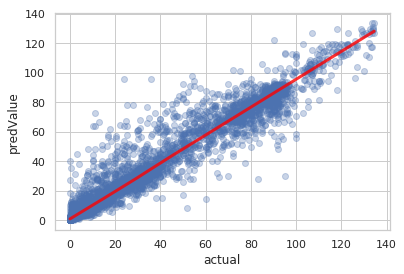

In [13]:
#testFunc(y_test[0:1],model_select_RFECV.transform(X_test)[0:1],clf_rf)
#predRes=[]
#for i in range(0,len(y_test)-1):
 #   pred=testFunc(y_test[i:i+1],model_select_RFECV.transform(X_test)[i:i+1],clf_rf)
#    predRes.append(pred)
#Show a plot of the predicted values against their actual values
actual=list(y_test["critical_temp"])
predVal=list(clf_rf.predict(model_select_RFECV.transform(X_test)))
resDict={"actual":actual,"predValue":predVal}
data=pd.DataFrame(resDict)
#data.boxplot(notch=True)
import statsmodels
import seaborn as sns
##Make a graph showing the effect of featData['mean_ThermalConductivity']) as a driver of the critical temperature
sns.set(style="whitegrid")
#print (data)

sns.regplot("actual", "predValue", data=data,
                        lowess=True,
                        scatter_kws={'alpha': 0.3},
                        line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})

In [ ]:
#Neural Network
from sklearn import preprocessing
from keras import models
from keras import layers
from keras import regularizers

# Start neural network
##https://chrisalbon.com/deep_learning/keras/feedforward_neural_network_for_regression/
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
##Input layer##
#network.add(layers.Dense(units=model_select_RFECV.transform(X_train).shape[1], activation='linear', input_shape=(model_select_RFECV.transform(X_train).shape[1],)))
network.add(layers.Dense(units=300, activation='linear', input_shape=(model_select_RFECV.transform(X_train).shape[1],)))

##Hiden layers##
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=150, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
network.add(layers.Dense(units=50, activation='relu',kernel_regularizer=regularizers.l2(0.05)))

##Output layer##
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

##Compile the model##
network.compile(loss='mse',optimizer='Adam')

##Summary of the Model Archtecture##
network.summary()
##Fitting the model to the training data-set##
#Training the model
print("Training the model on the Training Data-set")
network.fit(model_select_RFECV.transform(X_train_true), y_train_true, epochs=5000,batch_size=50)
#Testing the model on the test set
print("Running the model on the Testing Data-set")
testFunc(y_test,model_select_RFECV.transform(X_test),network)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               15300     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 68,051
Trainable params: 68,051
Non-trainable params: 0
_________________________________________________________________
Training the model on the Training Data-set
Epoch 1/5000
17010/17010 [==============================] - 3s 165us/step - loss: 669.7654
Epoch 2/5000
17010/17010 [==============================] - 1s 72us/step - loss: 404.9348
Epoch 3/5000
17010/17010 [===================

17010/17010 [==============================] - 1s 74us/step - loss: 223.2080
Epoch 82/5000
17010/17010 [==============================] - 1s 83us/step - loss: 225.2934
Epoch 83/5000
17010/17010 [==============================] - 1s 78us/step - loss: 214.7221
Epoch 84/5000
17010/17010 [==============================] - 1s 73us/step - loss: 215.8486
Epoch 85/5000
17010/17010 [==============================] - 1s 84us/step - loss: 216.1250
Epoch 86/5000
17010/17010 [==============================] - 1s 79us/step - loss: 212.3272
Epoch 87/5000
17010/17010 [==============================] - 1s 79us/step - loss: 214.4446
Epoch 88/5000
17010/17010 [==============================] - 1s 87us/step - loss: 215.6580
Epoch 89/5000
17010/17010 [==============================] - 1s 70us/step - loss: 212.9129
Epoch 90/5000
17010/17010 [==============================] - 1s 75us/step - loss: 210.7038
Epoch 91/5000
17010/17010 [==============================] - 1s 78us/step - loss: 212.9635
Epoch 92/5000

17010/17010 [==============================] - 1s 74us/step - loss: 191.0200
Epoch 171/5000
17010/17010 [==============================] - 1s 69us/step - loss: 192.9630
Epoch 172/5000
17010/17010 [==============================] - 1s 73us/step - loss: 193.9985
Epoch 173/5000
17010/17010 [==============================] - 1s 76us/step - loss: 189.6830
Epoch 174/5000
17010/17010 [==============================] - 1s 71us/step - loss: 190.5781
Epoch 175/5000
17010/17010 [==============================] - 1s 69us/step - loss: 189.9048
Epoch 176/5000
17010/17010 [==============================] - 1s 68us/step - loss: 193.9188
Epoch 177/5000
17010/17010 [==============================] - 1s 70us/step - loss: 188.8985
Epoch 178/5000
17010/17010 [==============================] - 1s 69us/step - loss: 192.8347
Epoch 179/5000
17010/17010 [==============================] - 1s 68us/step - loss: 188.4310
Epoch 180/5000
17010/17010 [==============================] - 1s 70us/step - loss: 188.1059
Epo

17010/17010 [==============================] - 1s 69us/step - loss: 179.7619
Epoch 259/5000
17010/17010 [==============================] - 1s 77us/step - loss: 178.7799
Epoch 260/5000
17010/17010 [==============================] - 1s 79us/step - loss: 179.7285
Epoch 261/5000
17010/17010 [==============================] - 1s 76us/step - loss: 180.4759
Epoch 262/5000
17010/17010 [==============================] - 1s 73us/step - loss: 179.4948
Epoch 263/5000
17010/17010 [==============================] - 1s 75us/step - loss: 177.5491
Epoch 264/5000
17010/17010 [==============================] - 1s 73us/step - loss: 174.2286
Epoch 265/5000
17010/17010 [==============================] - 1s 71us/step - loss: 177.8943
Epoch 266/5000
17010/17010 [==============================] - 1s 79us/step - loss: 174.2132
Epoch 267/5000
17010/17010 [==============================] - 1s 77us/step - loss: 175.7395
Epoch 268/5000
17010/17010 [==============================] - 1s 75us/step - loss: 176.1668
Epo

17010/17010 [==============================] - 1s 67us/step - loss: 169.6153
Epoch 348/5000
17010/17010 [==============================] - 1s 66us/step - loss: 168.6856
Epoch 349/5000
17010/17010 [==============================] - 1s 67us/step - loss: 168.5808
Epoch 350/5000
17010/17010 [==============================] - 1s 66us/step - loss: 170.5241
Epoch 351/5000
17010/17010 [==============================] - 1s 66us/step - loss: 175.1244
Epoch 352/5000
17010/17010 [==============================] - 1s 66us/step - loss: 167.0124
Epoch 353/5000
17010/17010 [==============================] - 1s 66us/step - loss: 170.2476
Epoch 354/5000
17010/17010 [==============================] - 1s 67us/step - loss: 164.8850
Epoch 355/5000
17010/17010 [==============================] - 1s 68us/step - loss: 168.1551
Epoch 356/5000
17010/17010 [==============================] - 1s 67us/step - loss: 169.8414
Epoch 357/5000
17010/17010 [==============================] - 1s 67us/step - loss: 166.8237
Epo

17010/17010 [==============================] - 1s 68us/step - loss: 159.0172
Epoch 437/5000
17010/17010 [==============================] - 1s 68us/step - loss: 161.7561
Epoch 438/5000
17010/17010 [==============================] - 1s 80us/step - loss: 157.9633
Epoch 439/5000
17010/17010 [==============================] - 1s 80us/step - loss: 163.6152
Epoch 440/5000
17010/17010 [==============================] - 1s 76us/step - loss: 162.0069
Epoch 441/5000
17010/17010 [==============================] - 1s 75us/step - loss: 158.8230
Epoch 442/5000
17010/17010 [==============================] - 1s 77us/step - loss: 161.5794
Epoch 443/5000
17010/17010 [==============================] - 1s 66us/step - loss: 158.8389
Epoch 444/5000
17010/17010 [==============================] - 1s 67us/step - loss: 160.9846
Epoch 445/5000
17010/17010 [==============================] - 1s 68us/step - loss: 159.7025
Epoch 446/5000
17010/17010 [==============================] - 1s 71us/step - loss: 160.6976
Epo

17010/17010 [==============================] - 1s 67us/step - loss: 154.0899
Epoch 526/5000
17010/17010 [==============================] - 1s 67us/step - loss: 156.7632
Epoch 527/5000
17010/17010 [==============================] - 1s 68us/step - loss: 153.5273
Epoch 528/5000
17010/17010 [==============================] - 1s 66us/step - loss: 156.7828
Epoch 529/5000
17010/17010 [==============================] - 1s 68us/step - loss: 154.5965
Epoch 530/5000
17010/17010 [==============================] - 1s 67us/step - loss: 156.3825
Epoch 531/5000
17010/17010 [==============================] - 1s 65us/step - loss: 154.3706
Epoch 532/5000
17010/17010 [==============================] - 1s 63us/step - loss: 153.1704
Epoch 533/5000
17010/17010 [==============================] - 1s 66us/step - loss: 153.4461
Epoch 534/5000
17010/17010 [==============================] - 1s 65us/step - loss: 156.7535
Epoch 535/5000
17010/17010 [==============================] - 1s 67us/step - loss: 157.5781
Epo

17010/17010 [==============================] - 2s 102us/step - loss: 152.7213
Epoch 615/5000
17010/17010 [==============================] - 1s 71us/step - loss: 154.1431
Epoch 616/5000
17010/17010 [==============================] - 1s 69us/step - loss: 153.4040
Epoch 617/5000
17010/17010 [==============================] - 1s 71us/step - loss: 149.4264
Epoch 618/5000
17010/17010 [==============================] - 1s 70us/step - loss: 150.2170
Epoch 619/5000
17010/17010 [==============================] - 1s 68us/step - loss: 151.5891
Epoch 620/5000
17010/17010 [==============================] - 1s 71us/step - loss: 154.2125
Epoch 621/5000
17010/17010 [==============================] - 1s 81us/step - loss: 152.5522
Epoch 622/5000
17010/17010 [==============================] - 1s 74us/step - loss: 150.5155
Epoch 623/5000
17010/17010 [==============================] - 1s 84us/step - loss: 156.8437
Epoch 624/5000
17010/17010 [==============================] - 1s 74us/step - loss: 152.6479
Ep

17010/17010 [==============================] - 1s 62us/step - loss: 146.8671
Epoch 704/5000
17010/17010 [==============================] - 1s 63us/step - loss: 146.8882
Epoch 705/5000
17010/17010 [==============================] - 1s 63us/step - loss: 148.0618
Epoch 706/5000
17010/17010 [==============================] - 1s 64us/step - loss: 146.2733
Epoch 707/5000
17010/17010 [==============================] - 1s 63us/step - loss: 148.1326
Epoch 708/5000
17010/17010 [==============================] - 1s 66us/step - loss: 146.4189
Epoch 709/5000
17010/17010 [==============================] - 1s 63us/step - loss: 147.6158
Epoch 710/5000
17010/17010 [==============================] - 1s 63us/step - loss: 146.1499
Epoch 711/5000
17010/17010 [==============================] - 1s 62us/step - loss: 147.1495
Epoch 712/5000
17010/17010 [==============================] - 1s 61us/step - loss: 145.2267
Epoch 713/5000
17010/17010 [==============================] - 1s 62us/step - loss: 146.3587
Epo

17010/17010 [==============================] - 1s 70us/step - loss: 143.6762
Epoch 793/5000
17010/17010 [==============================] - 1s 63us/step - loss: 142.9656
Epoch 794/5000
17010/17010 [==============================] - 1s 61us/step - loss: 141.1353
Epoch 795/5000
17010/17010 [==============================] - 1s 62us/step - loss: 142.8254
Epoch 796/5000
17010/17010 [==============================] - 1s 61us/step - loss: 141.4936
Epoch 797/5000
17010/17010 [==============================] - 1s 61us/step - loss: 140.6653
Epoch 798/5000
17010/17010 [==============================] - 1s 64us/step - loss: 143.2165
Epoch 799/5000
17010/17010 [==============================] - 1s 61us/step - loss: 141.1861
Epoch 800/5000
17010/17010 [==============================] - 1s 61us/step - loss: 142.8029
Epoch 801/5000
17010/17010 [==============================] - 1s 60us/step - loss: 141.7289
Epoch 802/5000
17010/17010 [==============================] - 1s 60us/step - loss: 141.0441
Epo

17010/17010 [==============================] - 1s 60us/step - loss: 140.7332
Epoch 882/5000
17010/17010 [==============================] - 1s 60us/step - loss: 137.1753
Epoch 883/5000
17010/17010 [==============================] - 1s 60us/step - loss: 136.6595
Epoch 884/5000
17010/17010 [==============================] - 1s 59us/step - loss: 139.0792
Epoch 885/5000
17010/17010 [==============================] - 1s 59us/step - loss: 136.0074
Epoch 886/5000
17010/17010 [==============================] - 1s 60us/step - loss: 137.8773
Epoch 887/5000
17010/17010 [==============================] - 1s 62us/step - loss: 139.1706
Epoch 888/5000
17010/17010 [==============================] - 1s 62us/step - loss: 138.0970
Epoch 889/5000
17010/17010 [==============================] - 1s 60us/step - loss: 137.7022
Epoch 890/5000
17010/17010 [==============================] - 1s 61us/step - loss: 138.8456
Epoch 891/5000
17010/17010 [==============================] - 1s 62us/step - loss: 139.0095
Epo

17010/17010 [==============================] - 1s 83us/step - loss: 130.5112
Epoch 971/5000
17010/17010 [==============================] - 1s 76us/step - loss: 131.7699
Epoch 972/5000
17010/17010 [==============================] - 1s 73us/step - loss: 132.7312
Epoch 973/5000
17010/17010 [==============================] - 1s 79us/step - loss: 133.0513
Epoch 974/5000
17010/17010 [==============================] - 1s 79us/step - loss: 133.0941
Epoch 975/5000
17010/17010 [==============================] - 1s 82us/step - loss: 135.4680
Epoch 976/5000
17010/17010 [==============================] - 1s 77us/step - loss: 134.4960
Epoch 977/5000
17010/17010 [==============================] - 1s 78us/step - loss: 132.9297
Epoch 978/5000
17010/17010 [==============================] - 1s 65us/step - loss: 133.5763
Epoch 979/5000
17010/17010 [==============================] - 1s 64us/step - loss: 134.7365
Epoch 980/5000
17010/17010 [==============================] - 1s 69us/step - loss: 133.2643
Epo

17010/17010 [==============================] - 1s 65us/step - loss: 131.3802
Epoch 1059/5000
17010/17010 [==============================] - 1s 65us/step - loss: 131.6949
Epoch 1060/5000
17010/17010 [==============================] - 1s 71us/step - loss: 132.3683
Epoch 1061/5000
17010/17010 [==============================] - 1s 66us/step - loss: 130.5428
Epoch 1062/5000
17010/17010 [==============================] - 1s 65us/step - loss: 132.7322
Epoch 1063/5000
17010/17010 [==============================] - 1s 66us/step - loss: 130.4243
Epoch 1064/5000
17010/17010 [==============================] - 1s 66us/step - loss: 127.8520
Epoch 1065/5000
17010/17010 [==============================] - 1s 63us/step - loss: 130.9503
Epoch 1066/5000
17010/17010 [==============================] - 1s 62us/step - loss: 131.1195
Epoch 1067/5000
17010/17010 [==============================] - 1s 61us/step - loss: 129.8106
Epoch 1068/5000
17010/17010 [==============================] - 1s 60us/step - loss: 13

17010/17010 [==============================] - 1s 61us/step - loss: 127.8783
Epoch 1147/5000
17010/17010 [==============================] - 1s 61us/step - loss: 127.7175
Epoch 1148/5000
17010/17010 [==============================] - 1s 61us/step - loss: 126.9339
Epoch 1149/5000
17010/17010 [==============================] - 1s 63us/step - loss: 127.9283
Epoch 1150/5000
17010/17010 [==============================] - 1s 80us/step - loss: 127.6331
Epoch 1151/5000
17010/17010 [==============================] - 1s 62us/step - loss: 129.5902
Epoch 1152/5000
17010/17010 [==============================] - 1s 64us/step - loss: 126.6297
Epoch 1153/5000
17010/17010 [==============================] - 1s 61us/step - loss: 125.1599
Epoch 1154/5000
17010/17010 [==============================] - 1s 63us/step - loss: 128.5545
Epoch 1155/5000
17010/17010 [==============================] - 1s 67us/step - loss: 124.5144
Epoch 1156/5000
17010/17010 [==============================] - 1s 63us/step - loss: 12

In [ ]:
network.summary()
#print(network.history.keys())
historyObj=network.history.__dict__["history"]


historyObj
##This 
# "Loss"
plt.plot(historyObj['loss'])
#plt.plot(historyObj['val_loss'])
plt.title('Training loss across Epochs')
plt.ylabel('Training loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss'], loc='upper right')
plt.show()